In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [9]:
N = 100
X = np.linspace(0,np.pi*6,100)
Y = np.sin(X)

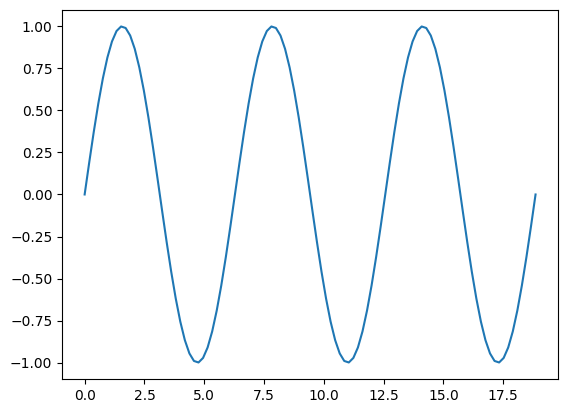

In [10]:
plt.plot(X,Y)
plt.show()

In [32]:
def make_poly(X,deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

#复盘代码的具体步骤
#test = np.array([1,2,3,4])
#n = len(test)
#data = [np.ones(n)]
#deg = 3

#for d in range(deg):
#        data.append(test**(d+1))

#########data:
#########[array([1., 1., 1., 1.]),
######### array([1, 2, 3, 4], dtype=int32),
######### array([ 1,  4,  9, 16]),
######### array([ 1,  8, 27, 64], dtype=int32)]


#np.vstack(data).T

#########np.vstack(data):
#########array([[ 1.,  1.,  1.,  1.],
#########       [ 1.,  2.,  3.,  4.],
#########       [ 1.,  4.,  9., 16.],
#########       [ 1.,  8., 27., 64.]])

#########np.vstack(data).T:
#########array([[ 1.,  1.,  1.,  1.],
#########       [ 1.,  2.,  4.,  8.],
#########       [ 1.,  3.,  9., 27.],
#########       [ 1.,  4., 16., 64.]])

In [28]:
def fit(X,Y):
    return np.linalg.solve(X.T.dot(X),X.T.dot(Y))

In [53]:
def fit_and_display(X,Y,sample,deg):
    N = len(X)
    train_idx = np.random.choice(N,sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    #plt.scatter(Xtrain,Ytrain)
    #plt.show()

    #fit polynomial
    Xtrain_poly = make_poly(Xtrain,deg)
    w = fit(Xtrain_poly,Ytrain)

    #display polynomial
    X_poly = make_poly(X,deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X,Y)
    plt.plot(X,Y_hat)
    plt.scatter(Xtrain,Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()

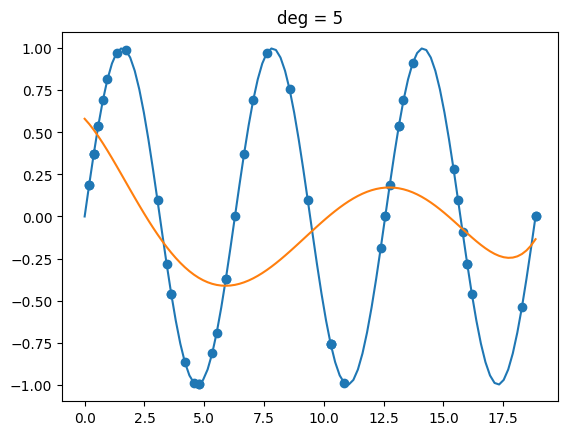

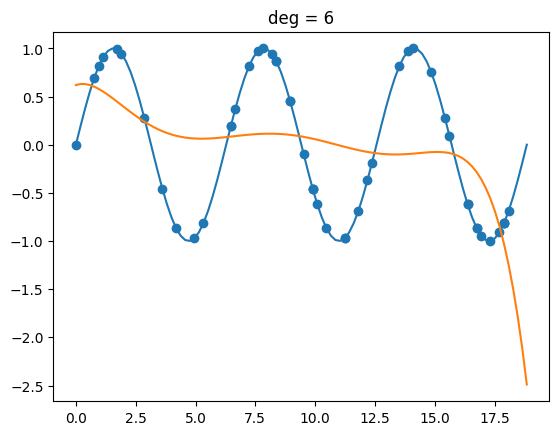

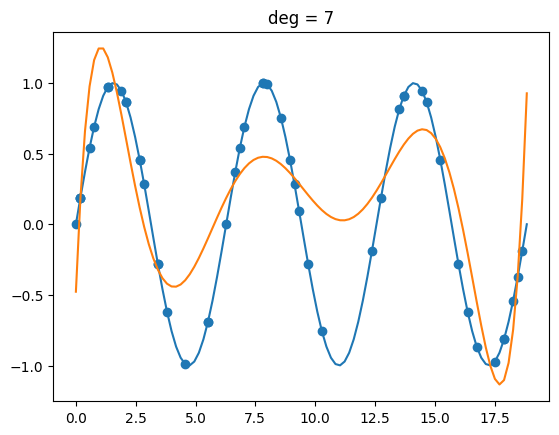

In [54]:
for deg in (5,6,7):
    fit_and_display(X, Y, 50, deg)

In [57]:
def get_mse(Y,Yhat):
    d = Y -Yhat
    return d.dot(d) / len(d)

In [89]:
def plot_train_vs_test_curves(X, Y, sample=10, max_deg=8):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    # test_idx = np.random.choice(N, sample)
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.scatter([i for i in range(len(mse_trains))],mse_trains)
    plt.plot(mse_tests, label="test mse")
    plt.scatter([i for i in range(len(mse_tests))],mse_tests)
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.scatter([i for i in range(len(mse_trains))],mse_trains)
    plt.legend()
    plt.show()

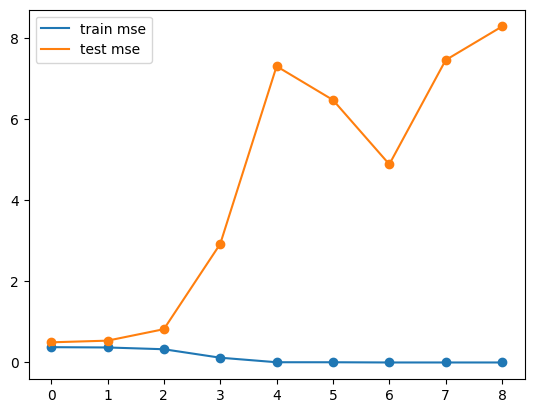

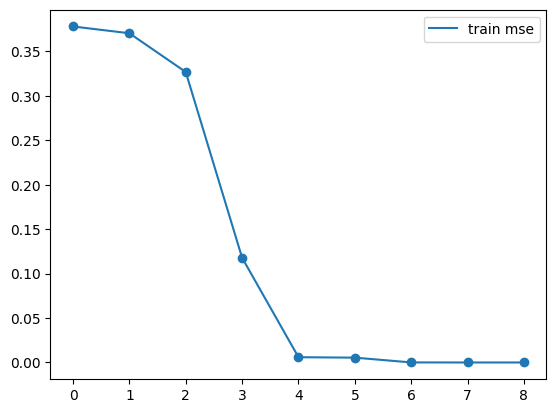

In [90]:
plot_train_vs_test_curves(X, Y)

3